In [1]:
from matplotlib import pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [2]:
evt_x = np.loadtxt("data/fit-data-4.txt")

In [3]:
evt_x.max()

np.float64(199.668612137749)

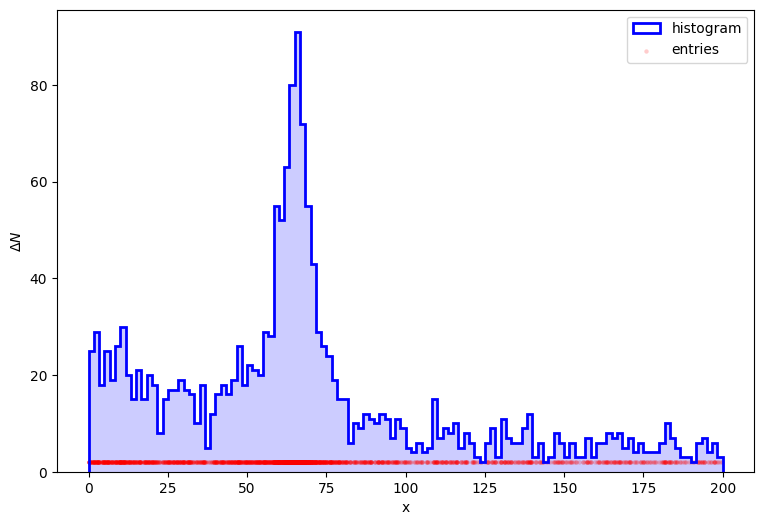

In [4]:
fig, ax = plt.subplots(figsize=(9, 6))
n_bins = 120
x_range = (0, 200)
data_y, bins, patches = ax.hist(evt_x, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
ax.hist(evt_x, n_bins, range=x_range, density=False, color='b', alpha=0.2)
ax.scatter(evt_x, np.full_like(evt_x, 2), marker='o', color='r', s=10, alpha=0.2, linewidth=0, label='entries')
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.legend()
plt.show()

In [5]:
#bins

In [21]:
data_x = (bins[1:] + bins[:-1])/2
delta_x = bins[1] - bins[0]
#print(data_x)
#print

In [22]:
data_yerr = np.sqrt(data_y)
#print(data_y)
#print(data_yerr)

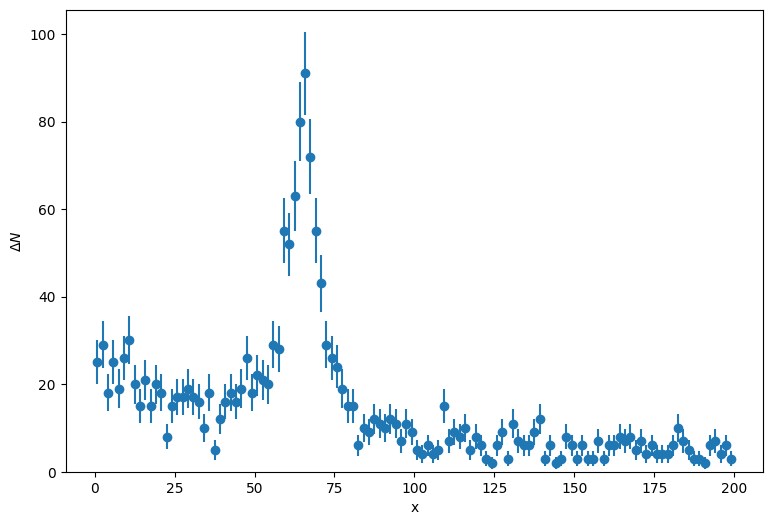

In [23]:
plt.figure(figsize=(9,6),dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.ylim(0)
plt.show()

In [24]:
def bkg_pdf(x, l):
    return np.exp(-x/l)/l
def sig_pdf(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2)/math.sqrt(2*math.pi*sigma**2)
def bkg_model(x, b, c, l):
    return b*bkg_pdf(x, l)*delta_x + c
def sig_model_1(x, s, mu, sigma):
    return s*sig_pdf(x, mu, sigma)*delta_x
def fit_model_1(x, b, c, l, s, mu, sigma):
    return bkg_model(x, b, c, l) + sig_model_1(x, s, mu, sigma)

In [25]:
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model_1)
m0 = Minuit(least_squares_mode,  250, 40 ,10, 100, 60, 1, name=("B", "C", "$\lambda$", "S", "$\mu$", "$\sigma$"))
m0.limits["$\sigma$"] = (0, 100)
m0.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 148.5 (χ²/ndof = 1.3)      │              Nfcn = 302              │
│ EDM = 2.53e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B    │  0.70e3   │  0.13e3   │            │            │         │         │       │
│ 1 │ C    │    3.3    │    0.8    │            │            │         │         │       │
│ 2 │ 𝜆    │    59     │    11     │            │            │         │         │       │
│ 3 │ S    │    549    │    30     │            │            │         │         │       │
│ 4 │ 𝜇    │   65.10   │   0.32    │            │            │         │         │       │
│ 5 │ 𝜎    │    5.8    │    0.4    │            │            │    0    │   100   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────────────────┐
│   │        B        C        𝜆        S        𝜇        𝜎 │
├───┼───────────────────────────────────────────────────────┤
│ B │ 1.61e+04    -97.3   1.33e3   -1.4e3     1.01   -18.09 │
│ C │    -97.3    0.658     -8.3      7.2    -0.00     0.09 │
│ 𝜆 │   1.33e3     -8.3      126  -0.11e3     0.02    -1.44 │
│ S │   -1.4e3      7.2  -0.11e3      912    -0.40     4.69 │
│ 𝜇 │     1.01    -0.00     0.02    -0.40    0.101    -0.01 │
│ 𝜎 │   -18.09     0.09    -1.44     4.69    -0.01    0.162 │
└───┴───────────────────────────────────────────────────────┘

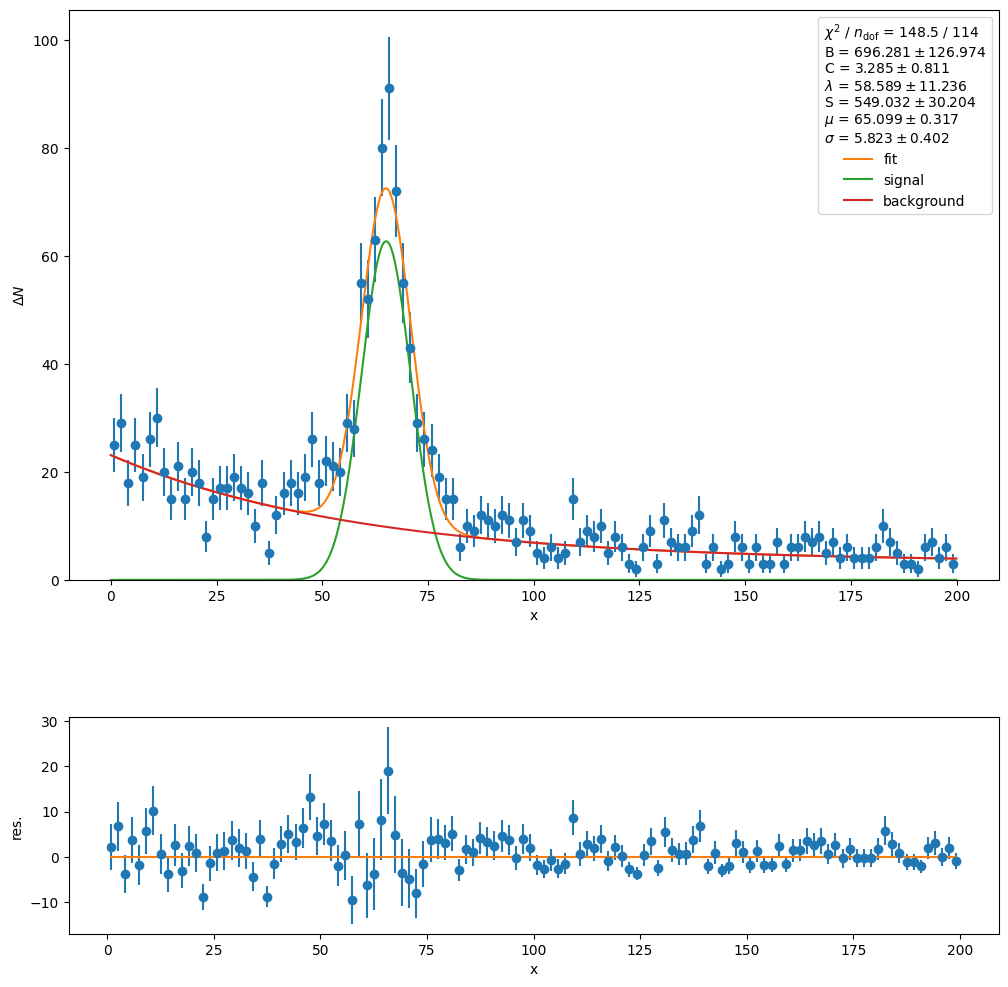

In [26]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
b, c, l, s, mu, sigma = m0.values
data_y_f = fit_model_1(data_x_f, *m0.values)
bkg_y_f = bkg_model(data_x_f, b, c, l)
sig_y_f = sig_model_1(data_x_f, s, mu, sigma)

plt.figure(figsize=(12,12),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, data_y-fit_model_1(data_x, *m0.values), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m0.fval:.1f} / {len(data_x) - m0.nfit}" ]
for p, v, e in zip(m0.parameters, m0.values, m0.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()

In [27]:
def sig_model(x, s1, s2, mu, sigma1, sigma2):
    return s1*sig_pdf(x, mu, sigma1) + s2*sig_pdf(x, mu, sigma2)
def fit_model(x, b, c, l, s1, s2, mu, sigma1, sigma2):
    return bkg_model(x, b, c, l) + sig_model(x, s1, s2, mu, sigma1, sigma2)

In [28]:
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model)
m = Minuit(least_squares_mode,  250, 40 ,10, 100, 60, 60, 0.5, 2.5, name=("B", "C", "$\lambda$", "S1", "S2", "$\mu$", "$\sigma_1$","$\sigma_2$"))
m.limits["$\sigma_1$"] = (0, 10)
m.limits["$\sigma_2$"] = (0, 100)

In [29]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 130.2 (χ²/ndof = 1.2)      │              Nfcn = 766              │
│ EDM = 4.85e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B    │    510    │    80     │            │            │         │         │       │
│ 1 │ C    │    4.1    │    0.5    │            │            │         │         │       │
│ 2 │ 𝜆    │    42     │     9     │            │            │         │         │       │
│ 3 │ S1   │    600    │    100    │            │            │         │         │       │
│ 4 │ S2   │    450    │    70     │            │            │         │         │       │
│ 5 │ 𝜇    │   65.05   │   0.30    │            │            │         │         │       │
│ 6 │ 𝜎₁   │   10.0    │    1.7    │            │            │    0    │   10    │       │
│ 7 │ 𝜎₂   │    3.5    │    0.5    │            │            │    0    │   100   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────────────────────────────┐
│    │           B           C           𝜆          S1          S2           𝜇          𝜎₁          𝜎₂ │
├────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│  B │    7.15e+03      -39.41         670        -4e3         2e3        1.48  10.3257e-6        7.87 │
│  C │      -39.41       0.288       -3.91       18.74       -7.63       -0.01    -43.0e-9       -0.03 │
│  𝜆 │         670       -3.91        75.5        -430         180        0.09   1.0069e-6        0.79 │
│ S1 │        -4e3       18.74        -430    9.87e+03        -6e3       -1.64  11.3585e-6      -29.98 │
│ S2 │         2e3       -7.63         180        -6e3    5.41e+03        0.77 -19.2451e-6       24.36 │
│  𝜇 │        1.48       -0.01        0.09       -1.64        0.77      0.0926      2.8e-9       -0.01 │
│ 𝜎₁ │  10.3257e-6    -43.0e-9   1.0069e-6  11.3585e-6 -19.2451e-6      2.8e-9    9.56e-10    -74.8e-9 │
│ 𝜎₂ │        7.87       -0.03        0.79      -29.98       24.36       -0.01    -74.8e-9       0.222 │
└────┴─────────────────────────────────────────────────────────────────────────────────────────────────┘

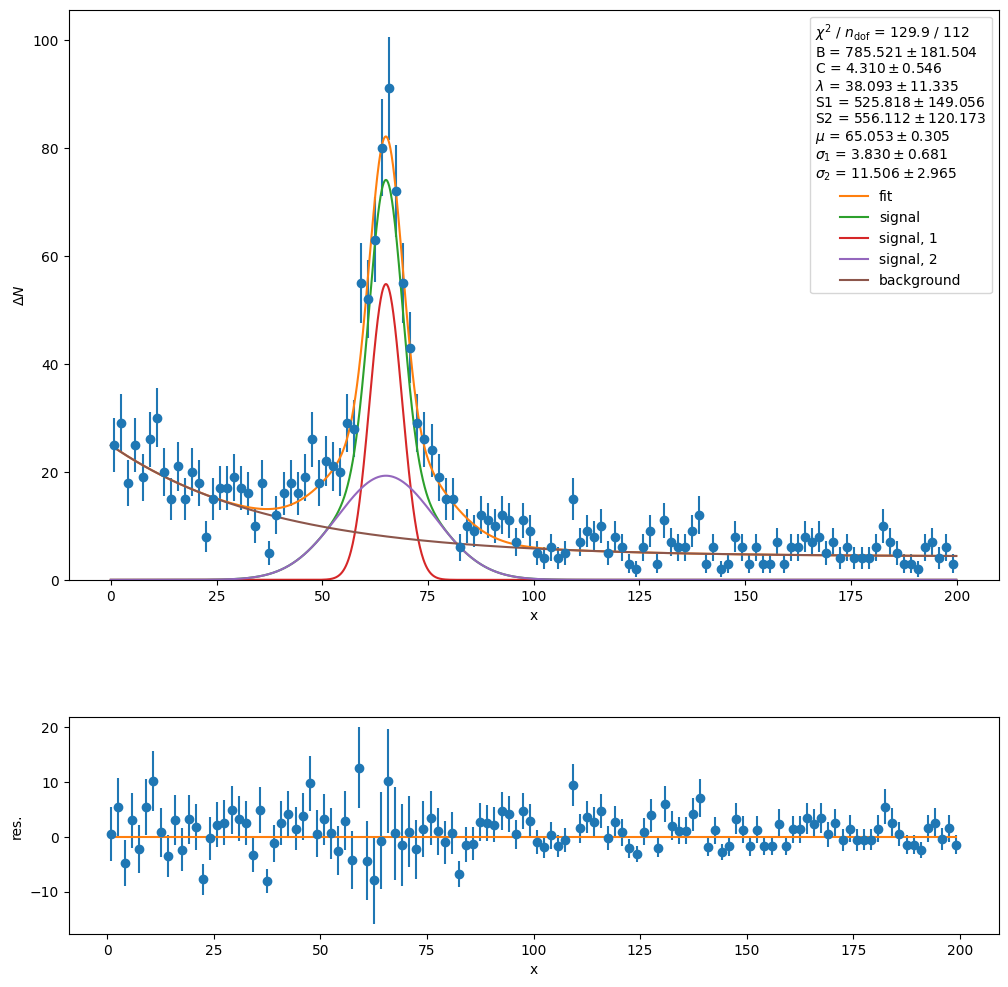

In [15]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
b, c, l, s1, s2, mu, sigma1, sigma2 = m.values
data_y_f = fit_model(data_x_f, *m.values)
bkg_y_f = bkg_model(data_x_f, b, c, l)
sig_y_f = sig_model(data_x_f, s1, s2, mu, sigma1, sigma2)
sig_y_f1 = sig_model_1(data_x_f, s1, mu, sigma1)
sig_y_f2 = sig_model_1(data_x_f, s2, mu, sigma2)

plt.figure(figsize=(12,12),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal")
ax0.plot(data_x_f, sig_y_f1, label="signal, 1")
ax0.plot(data_x_f, sig_y_f2, label="signal, 2")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, data_y-fit_model(data_x, *m.values), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()
plt.show()
plt.show()